In [13]:
import pandas as pd
from pyvis.network import Network

In [14]:
df = pd.read_csv("/imp_net_data.csv")
df

,source,sink,counts,source_name,sink_name,label,connections,idx,colour,id,p1,p2,p1p2,From,To,Count,Unnamed: 16,Unnamed: 17
0,0,773,767,200,Strongly agree to Revising and Updating,Strongly agree to Policymaking,Strongly agree to Revising and Updating Strong...,773 767,#2f3011,231,278,0.865801,0.719424,0.622878,Strongly agree to Revising and Updating 62.29,Strongly agree to Policymaking,200,NaN
1,1,771,766,33,Strongly disagree to Revising and Updating,Strongly disagree to Policymaking,Strongly disagree to Revising and Updating Str...,771 766,#659e9e,41,45,0.804878,0.733333,0.590244,Strongly disagree to Revising and Updating 59.02,Strongly disagree to Policymaking,33,NaN
2,2,772,768,254,Agree to Revising and Updating,Agree to Policymaking,Agree to Revising and Updating Agree to Policy...,772 768,#4b11e2,353,318,0.719547,0.798742,0.574732,Agree to Revising and Updating 57.47,Agree to Policymaking,254,NaN
3,3,767,763,196,Strongly agree to Policymaking,Strongly agree to dissemination of GK,Strongly agree to Policymaking Strongly agree ...,767 763,#9d94b4,278,276,0.705036,0.710145,0.500678,Strongly agree to Policymaking 50.07,Strongly agree to dissemination of GK,196,NaN
4,4,768,762,227,Agree to Policymaking,Agree to dissemination of GK,Agree to Policymaking Agree to dissemination o...,768 762,#27abc3,318,339,0.713836,0.669617,0.477997,Agree to Policymaking 47.8,Agree to dissemination of GK,227,NaN
5,5,766,761,33,Strongly disagree to Policymaking,Strongly disagree to dissemination of GK,Strongly disagree to Policymaking Strongly dis...,766 761,#866bbe,45,56,0.733333,0.589286,0.432143,Strongly disagree to Policymaking 43.21,Strongly disagree to dissemination of GK,33,NaN
6,6,774,770,17,Disagree to Revising and Updating,Disagree to Policymaking,Disagree to Revising and Updating Disagree to ...,774 770,#bf7be3,38,39,0.447368,0.435897,0.195007,Disagree to Revising and Updating 19.5,Disagree to Policymaking,17,NaN
7,7,775,769,32,Neutral towards to Revising and Updating,Neutral towards to Policymaking,Neutral towards to Revising and Updating Neutr...,775 769,#e6f479,83,68,0.385542,0.470588,0.181432,Neutral towards to Revising and Updating 18.14,Neutral towards to Policymaking,32,NaN
8,8,769,764,23,Neutral towards to Policymaking,Neutral towards to dissemination of GK,Neutral towards to Policymaking Neutral toward...,769 764,#884f41,68,48,0.338235,0.479167,0.162071,Neutral towards to Policymaking 16.21,Neutral towards to dissemination of GK,23,NaN
9,9,770,765,12,Disagree to Policymaking,Disagree to dissemination of GK,Disagree to Policymaking Disagree to dissemina...,770 765,#f1600a,39,35,0.307692,0.342857,0.105495,Disagree to Policymaking 10.55,Disagree to dissemination of GK,12,NaN


In [15]:
# joint probability greater than 10
df['Joint_Probability'] = df['p1p2'] * 100
filtered_df = df[df['Joint_Probability'] > 10]

In [16]:
#network_plot
got_net = Network(height='1080px', width='100%', bgcolor='#ffffff', font_color='black', directed=False)

# Now we will modify the filtered_df dataset to create a network
sources = filtered_df['source_name']
targets = filtered_df['sink_name']
weights_nodes = filtered_df['p1']  # Joint probabilities rounded to three decimal points
colours = filtered_df['colour']
weights_edges = filtered_df['p1p2']

for src, dst, wn, we, c in zip(sources, targets, weights_nodes, weights_edges, colours):
    got_net.add_node(src, label=src, title=str(src), value=wn, color=c)
    got_net.add_node(dst, label=dst, title=str(dst), color='#ffd700')
    got_net.add_edge(src, dst, value=we, label=we, color=c)

# Save the visualization as an HTML file
got_net.write_html('got.html')

In [17]:
# netwrok_plot_2
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network

got_data = filtered_df
got_net.barnes_hut()

sources = got_data['source_name']
targets = got_data['sink_name']
weights = got_data['p1p2']

edge_data = zip(sources, targets, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node_id = node["id"]
    neighbors = neighbor_map[node_id]
    neighbor_str = "<br>".join(str(neighbor) for neighbor in neighbors)
    node_title = node.get("title", "")
    node["title"] = str(node_title) + f" Neighbors:<br>{neighbor_str}"
    node["value"] = len(neighbors)

got_net.write_html("filtered_df.html")

In [18]:
#line plot
df_filtered = filtered_df[['p1', 'p2', 'p1p2']]
df_filtered.index = filtered_df['label']
df_filtered

,p1,p2,p1p2
label,,,
Strongly agree to Policymaking,278,0.865801,0.719424
Strongly disagree to Policymaking,45,0.804878,0.733333
Agree to Policymaking,318,0.719547,0.798742
Strongly agree to dissemination of GK,276,0.705036,0.710145
Agree to dissemination of GK,339,0.713836,0.669617
Strongly disagree to dissemination of GK,56,0.733333,0.589286
Disagree to Policymaking,39,0.447368,0.435897
Neutral towards to Policymaking,68,0.385542,0.470588
Neutral towards to dissemination of GK,48,0.338235,0.479167


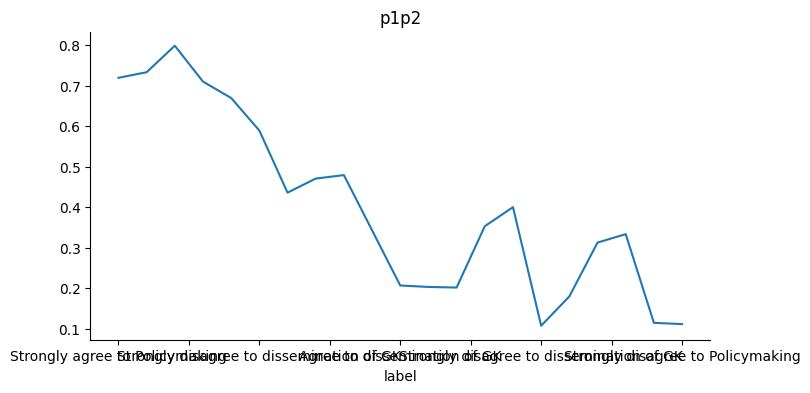

In [19]:
#line plot_1

from matplotlib import pyplot as plt
df_filtered['p1p2'].plot(kind='line', figsize=(8, 4), title='p1p2')
plt.gca().spines[['top', 'right']].set_visible(False)

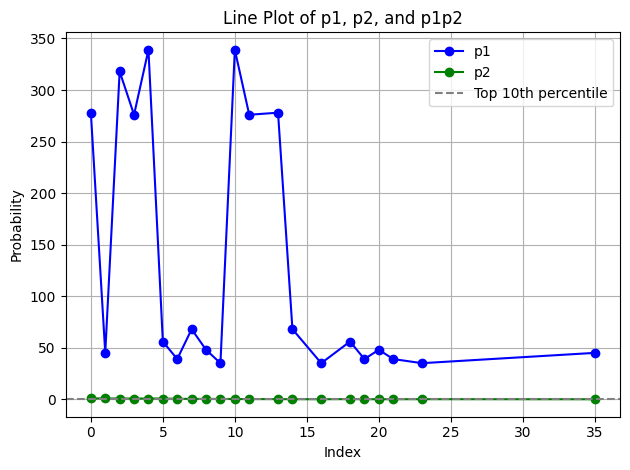

<Figure size 640x480 with 0 Axes>

In [21]:
#Plot p1
plt.plot(filtered_df.index, filtered_df['p1'], label='p1', marker='o', color='blue')

# Plot p2
plt.plot(filtered_df.index, filtered_df['p2'], label='p2', marker='o', color='green')

# Add vertical line for top 10th percentile of p1p2
top_10_percentile = filtered_df['p1p2'].quantile(0.9)
plt.axhline(y=top_10_percentile, color='gray', linestyle='--', label='Top 10th percentile')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Line Plot of p1, p2, and p1p2')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("line_plot.png")

In [20]:
#
import dash_bio

figx = dash_bio.Clustergram(
    data=df_filtered,
    column_labels=list(df_filtered.columns.values),
    row_labels=list(df_filtered.index),

    height=800,
    width=700
)
figx

In [22]:
# Sankey plot
from matplotlib.sankey import Sankey
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [23]:
#parameters of sankey plot
sources = list(filtered_df['source'])
targets = list(filtered_df['sink'])
values = list(filtered_df['p1p2'])
labels = list(filtered_df['label'])
colours = list(filtered_df['colour'])

In [26]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 2,
      thickness = 1,
      line = dict(color = 'red', width = 5),
      label = labels,
      customdata = labels,
      hovertemplate='Source has total value %{value}<extra></extra>',
      color = 'blue',
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values,
      customdata = labels,
        color = colours,
      hovertemplate='Count: %{value}'+
        '<br />Option: %{customdata}<extra></extra>'
  ))])

go.Layout(title='Sankey plot',
          #other options for the plot
           hoverlabel=dict(font=dict(family='sans-serif', size=100)))


fig = fig.update_layout(margin=dict(t=100))
fig

In [27]:
fig.write_html("sankey.html")